### 多项式逻辑回归

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [14]:
np.random.seed(86)
X = np.random.normal(0,1,size=(200,2))
y =np.array((X[:,0]**2)+(X[:,1]**2) < 2,dtype='int')
# 判断距离平方是否小于2，返回一个布尔数组（True 或 False）
# dtype = 'int':将布尔值转换成整数，True为1，False为0
y

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1])

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=86)

<function matplotlib.pyplot.show(close=None, block=None)>

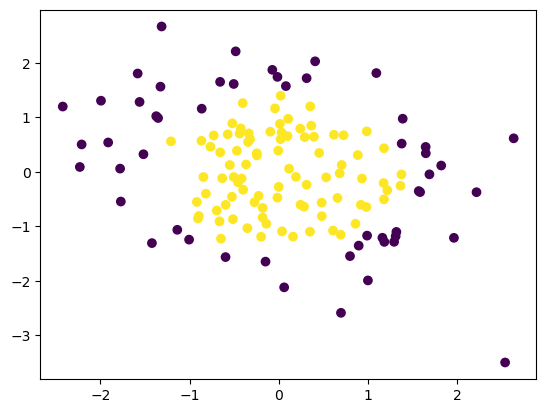

In [28]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show

In [30]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [38]:
clf.score(x_train,y_train)

0.6285714285714286

In [40]:
clf.score(x_test,y_test)

0.5833333333333334

### 多项式逻辑回归

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly = PolynomialFeatures(degree=2)
poly.fit(x_train)
# 对训练数据进行拟合，记录分析特征数量

PolynomialFeatures()

In [61]:
x2 =poly.transform(x_train)
x2t =poly.transform(x_test)

In [63]:
clf.fit(x2,y_train)

LogisticRegression()

In [65]:
clf.score(x2, y_train)

0.9928571428571429

In [67]:
clf.score(x2t, y_test)

0.95

### 多分类OVR和OVO代码实现

In [70]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 86)

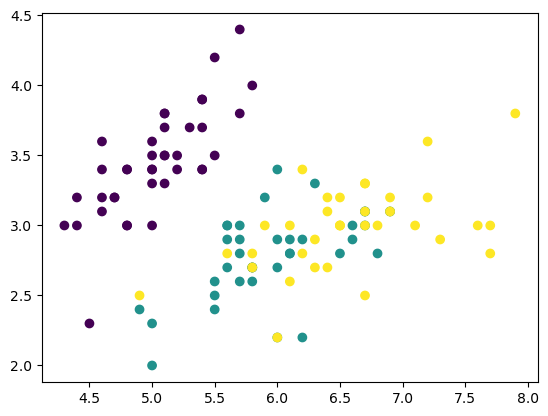

In [76]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [82]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(clf)
# 输入分类器，clf还是前面使用的逻辑回归分类器
ovr.fit(x_train,y_train)
ovr.score(x_test,y_test)

1.0

In [84]:
from sklearn.multiclass import OneVsOneClassifier

ovr = OneVsOneClassifier(clf)
# 输入分类器，clf还是前面使用的逻辑回归分类器
ovr.fit(x_train,y_train)
ovr.score(x_test,y_test)

1.0